# Forward Error Correction Channel Simulation

In [39]:
import matplotlib.pyplot as plt
import numpy as np

%store -r rx_buffer pad

In [60]:
hard_data = rx_buffer[::pad]

hard_binary = ''
for hd in hard_data:
    h_bin = '{0:08b}'.format(hd)
    hard_binary += h_bin[::-1] # Decoder accepts LSB first
    
print(hard_binary)

1001001000110110111100011010100110010101011100101100110000000100010110111111101001000101001111011100100001101110101111010101110101010000110001100011011111100010100111010001111101111100000001111000101011100111011100110100110101010010111011011000000011110011110011101001101000001111000100000110111111100011111011111110100101010000011101101000111001010011000110101001011011110110000010101110101101101011101001011101000010010010010011110111110011000001100111101001001110101111010101010011011111001011110110000010001101111001011011110110010101001011011011001000111000101010010011110000111001100110101000001100101110011100011000110110010000001001010010111101000110010000101001100011110011000000110000101110011011001000001011111100110101010100000011100001111011000111111101111101100111111001010000000111011010100010111111001001011001110110101001000011100100100011001101100101110011101001111110101111001010011001100101001101111111000100101111111010100010001111111000001101111101011010110110001101110111011101

<function matplotlib.pyplot.show(*args, **kw)>

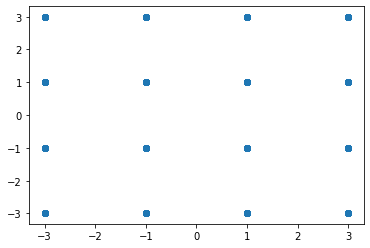

In [80]:
L = 4 # Symbol length
    
mod_I = np.empty(0)
mod_Q = np.empty(0)
for i in range(0, len(hard_binary), L):
    symbol = hard_binary[i : i+L]
    
    b0b1 = symbol[0:2]
    b2b3 = symbol[2:4]

    if b0b1 == '00':
        I = -3
    elif b0b1 == '01':
        I = -1
    elif b0b1 == '11':
        I = 1
    elif b0b1 == '10':
        I = 3

    if b2b3 == '00':
        Q = -3
    elif b2b3 == '01':
        Q = -1
    elif b2b3 == '11':
        Q = 1
    elif b2b3 == '10':
        Q = 3
        
    mod_I = np.append(mod_I, I)
    mod_Q = np.append(mod_Q, Q)

plt.scatter(mod_I, mod_Q)
plt.show

In [88]:
std

3.122989148954859

In [91]:
max(noise)

(8.923151872779462+3.3266582055914773j)

<function matplotlib.pyplot.show(*args, **kw)>

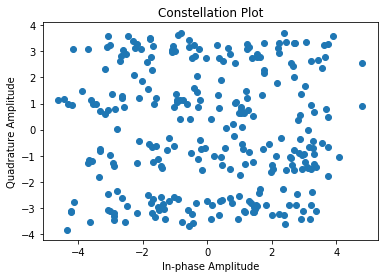

In [148]:
modulated = mod_I + 1j*mod_Q

SNR = -6.25

mod_I_mean = 10*np.log10(abs(np.mean(modulated.real)))
mod_Q_mean = 10*np.log10(abs(np.mean(modulated.imag)))

noise_I_avg = 10 ** ((mod_I_mean - SNR) / 10)
noise_Q_avg = 10 ** ((mod_Q_mean - SNR) / 10)

noise_I = np.random.normal(0, np.sqrt(noise_I_avg), len(modulated.real))
noise_Q = np.random.normal(0, np.sqrt(noise_Q_avg), len(modulated.imag))

mod_I_noisey = mod_I + noise_I
mod_Q_noisey = mod_Q + noise_Q

modulated_noisey = mod_I_noisey + 1j * mod_Q_noisey

x = [n.real for n in modulated_noisey]
y = [n.imag for n in modulated_noisey]   

plt.scatter(x, y)
plt.ylabel('Quadrature Amplitude')
plt.xlabel('In-phase Amplitude')
plt.title('Constellation Plot')
# plt.rcParams['figure.figsize'] = [4, 4]
# plt.rcParams['figure.dpi'] = 200
plt.show

the LLR is (2 * r)/sigma^2 where r is the received symbol and sigma^2 is the noise power

In [149]:
llrs = []
for y in modulated_noisey:
    # Bit 0
    if y.real < -2:
        b0 = 2*(y.real+1)
    elif y.real >= -2 and y.real < 2:
        b0 = y.real
    elif y.real > 2:
        b0 = 2*(y.real-1)
        
    # Bit 1
    b1 = -abs(y.real)+2
    
    # Bit 2
    if y.imag < -2:
        b2 = 2*(y.imag+1)
    elif y.imag >= -2 and y.imag < 2:
        b2 = y.imag
    elif y.imag > 2:
        b2 = 2*(y.imag-1) 
        
    # Bit 3
    b3 = -abs(y.imag)+2
    
    llrs.append(b0)
    llrs.append(b1)
    llrs.append(b2)
    llrs.append(b3)

In [150]:
%store llrs

Stored 'llrs' (list)
